In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [120]:
job="network_engineer"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [121]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Vmoksha Technologies Pvt. Ltd,SOC Network Engineer,Bengaluru,750000.0,"TCP, Azure, Windows, Firewall, Analysis skills",NaN,Network Engineer
1,Airowire Networks Pvt Ltd,Network Engineer Intern,Bengaluru,168000.0,"TCP, Azure, Ansible, Git, AWS",NaN,Network Engineer
2,Amazon Web Services India Private Limited - An...,Network Engineer,Hyderābād,0.0,"Network administration, TCP, Operating systems...",3.6,Network Engineer
3,Norstella,NOC Engineer,Remote,0.0,"Azure, Incident management, PaaS, AWS, Machine...",3.4,Network Engineer
4,Nexapp Technologies,Network Engineer-NOC-L1 Support,Pune,4800000.0,"TCP, Operating systems, Customer service, Wind...",4.1,Network Engineer


In [122]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                    24
company_rating           184
standardized_job_role      0
dtype: int64

In [123]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [124]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
2,Amazon Web Services India Private Limited - An...,Network Engineer,Hyderābād,0.0,"Network administration, TCP, Operating systems...",3.6,Network Engineer
3,Norstella,NOC Engineer,Remote,0.0,"Azure, Incident management, PaaS, AWS, Machine...",3.4,Network Engineer
13,SITA Switzerland Sarl,Infrastructure Specialist (Network Administrator),Delhi,0.0,"Azure, Network infrastructure, Firewall, Analy...",3.7,Network Engineer
18,Qualcomm,Wlan Networking Software Engineer,Bengaluru,0.0,"TCP, Data structures, LAN, OS Kernels, C",3.9,Network Engineer
34,InfluxService,US Network Administrator (L1/L2 support),Mohali,0.0,"Network administration, System administration,...",NaN,Network Engineer
...,...,...,...,...,...,...,...
433,Crypto Mize,Network Administrator,Delhi,0.0,"Network administration, System administration,...",4.8,Network Engineer
442,Hubcom Techno System,Network and Security Engineer,Mumbai,0.0,"QoS, TCP, Azure, Software deployment, OSPF",NaN,Network Engineer
448,SafeAeon Pvt Ltd,Senior Network Engineer,India,0.0,"TCP, Load balancing, OSPF, LAN, Firewall",5.0,Network Engineer
449,Staff4Me,Lead Wireless Network Engineer (Advanced Wirel...,Remote,0.0,"Team management, Computer networking, Network ...",NaN,Network Engineer


### Filling the null values by replacing with average salary of company rating

In [126]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [127]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [128]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Vmoksha Technologies Pvt. Ltd,SOC Network Engineer,Bengaluru,7.500000,"TCP, Azure, Windows, Firewall, Analysis skills",0.0,Network Engineer
1,Airowire Networks Pvt Ltd,Network Engineer Intern,Bengaluru,1.680000,"TCP, Azure, Ansible, Git, AWS",0.0,Network Engineer
2,Amazon Web Services India Private Limited - An...,Network Engineer,Hyderābād,19.012500,"Network administration, TCP, Operating systems...",3.6,Network Engineer
3,Norstella,NOC Engineer,Remote,5.714286,"Azure, Incident management, PaaS, AWS, Machine...",3.4,Network Engineer
4,Nexapp Technologies,Network Engineer-NOC-L1 Support,Pune,48.000000,"TCP, Operating systems, Customer service, Wind...",4.1,Network Engineer
...,...,...,...,...,...,...,...
450,Pyramid Global Technologies,IT Network Engineer,Mohali,6.000000,"Cisco ISE, CI/CD, Performance tuning, Cloud in...",5.0,Network Engineer
451,NTT DATA,Senior Engineer - Network & MIST,Karnataka,10.517241,"Network administration, QoS, Azure, OSPF, LAN",3.8,Network Engineer
452,Avient,"Analyst, LAN & WiFi, Network Infrastructure",Pune,5.500000,"5G, LAN, Analysis skills, Project management, ...",3.6,Network Engineer
453,Avient,"Analyst, Network Security, Network Infrastructure",Pune,5.500000,"5G, LAN, Analysis skills, Project management, ...",3.6,Network Engineer


In [129]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [130]:
df.describe()

,salary_lpa,company_rating
count,455.000000,455.000000
mean,10.719447,2.252967
std,12.061280,1.920544
min,0.840000,0.000000
25%,3.900000,0.000000
50%,5.000000,3.400000
75%,12.000000,3.900000
max,48.000000,5.000000


In [131]:
df.nunique()

company_name             386
job_role                 218
job_location              55
salary_lpa               102
skills                   393
company_rating            28
standardized_job_role      1
dtype: int64

In [132]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [134]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [135]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                      Skill  Count
3                  firewall    156
0                       tcp    111
34      computer networking    110
21                      lan    108
11                     ospf     99
..                      ...    ...
129               pre-sales      1
127  project implementation      1
126  desktop administration      1
124                 vcenter      1
193              kubernetes      1

[194 rows x 2 columns]


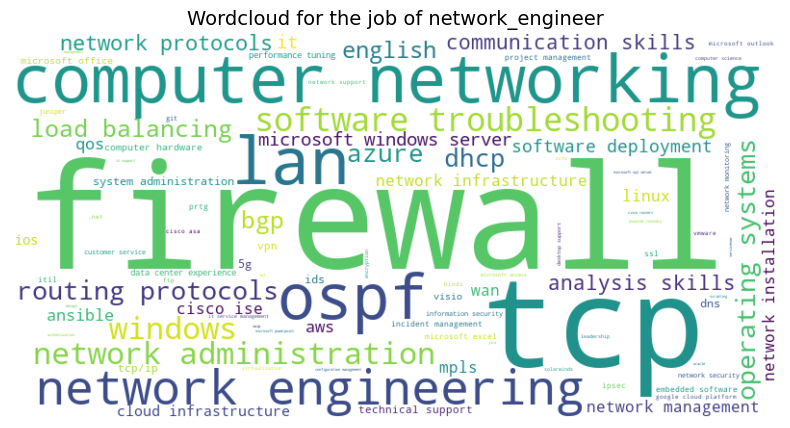

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


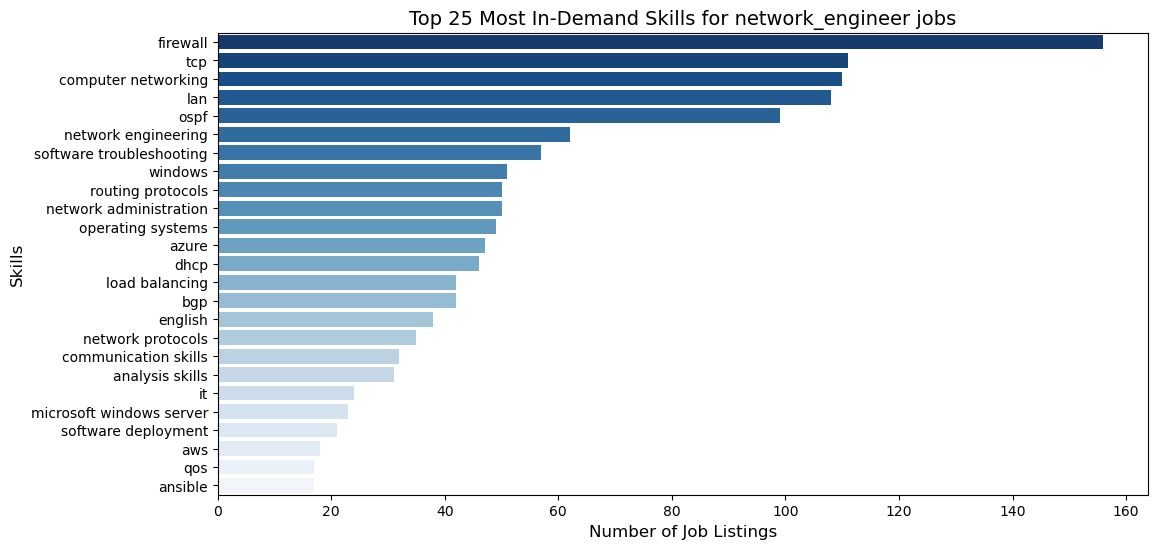

In [137]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [139]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                          company_name  salary_lpa
111             Excel Global Solutions        48.0
328               Trillion IT Services        48.0
148        I Ridge Technology Services        48.0
217                Nexapp Technologies        48.0
348                           Vodafone        48.0
6                            AWL India        48.0
363                     Zaco Computers        48.0
178  Karishma Marine Solutions Pvt Ltd        48.0
79                DA VINCI DERIVATIVES        48.0
284    Shri Vile Parle Kelavani Mandal        48.0


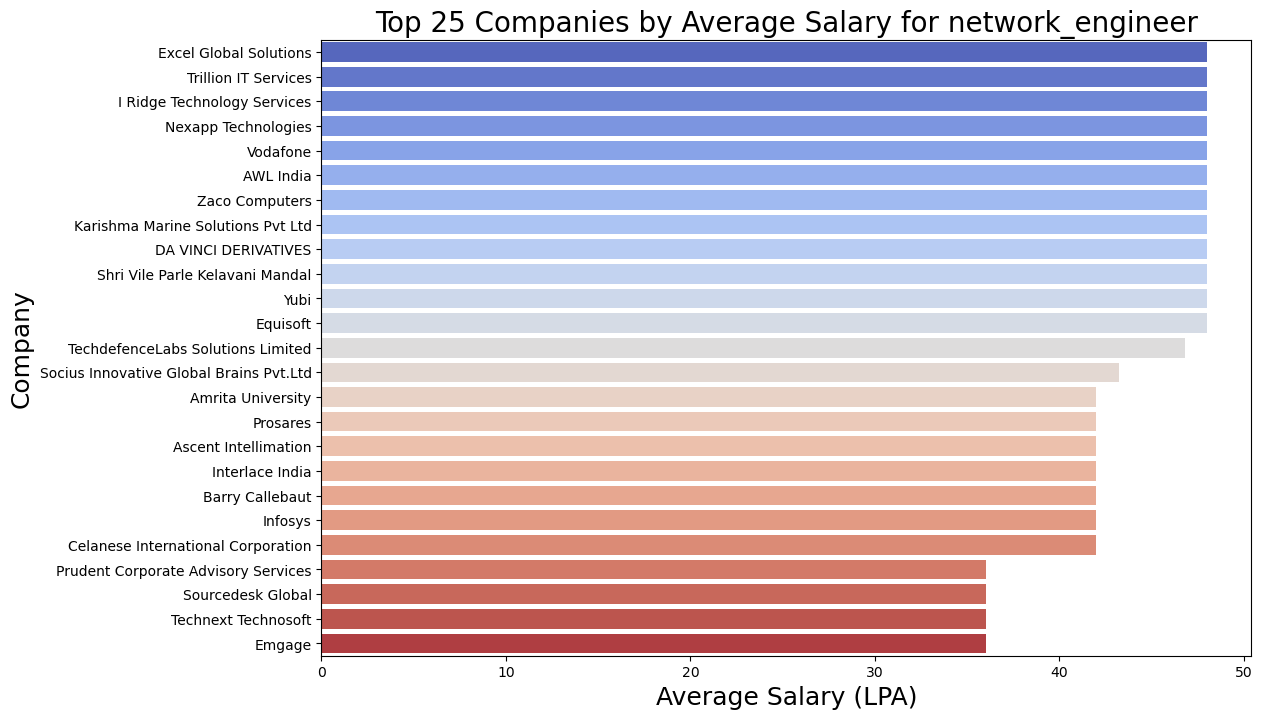

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

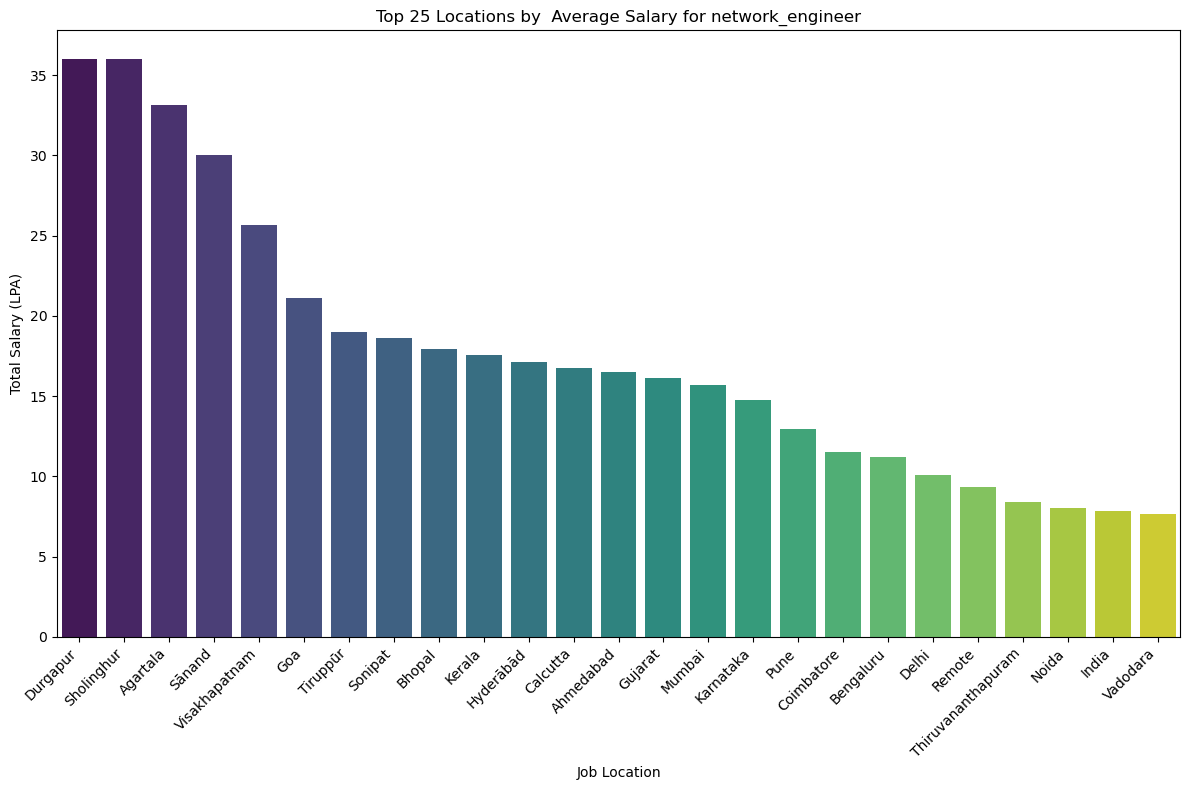

In [142]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

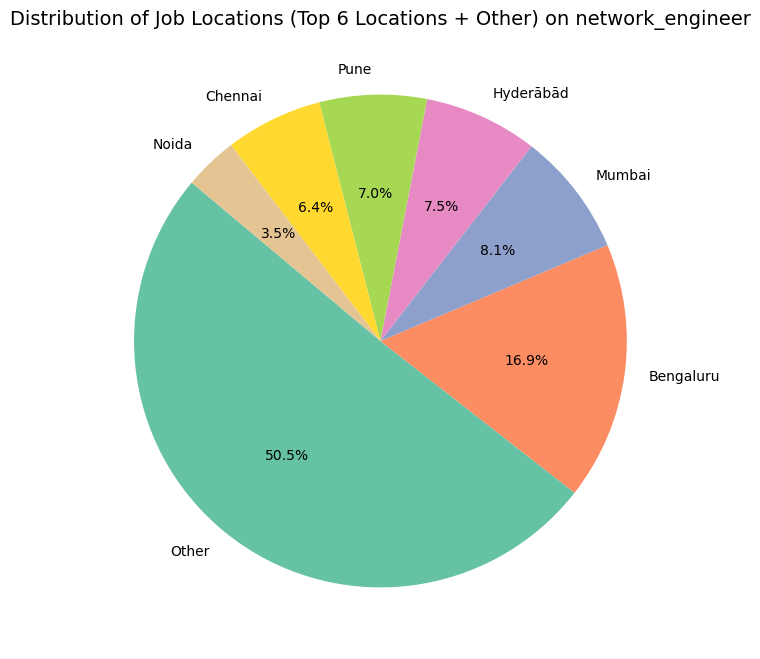

In [143]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

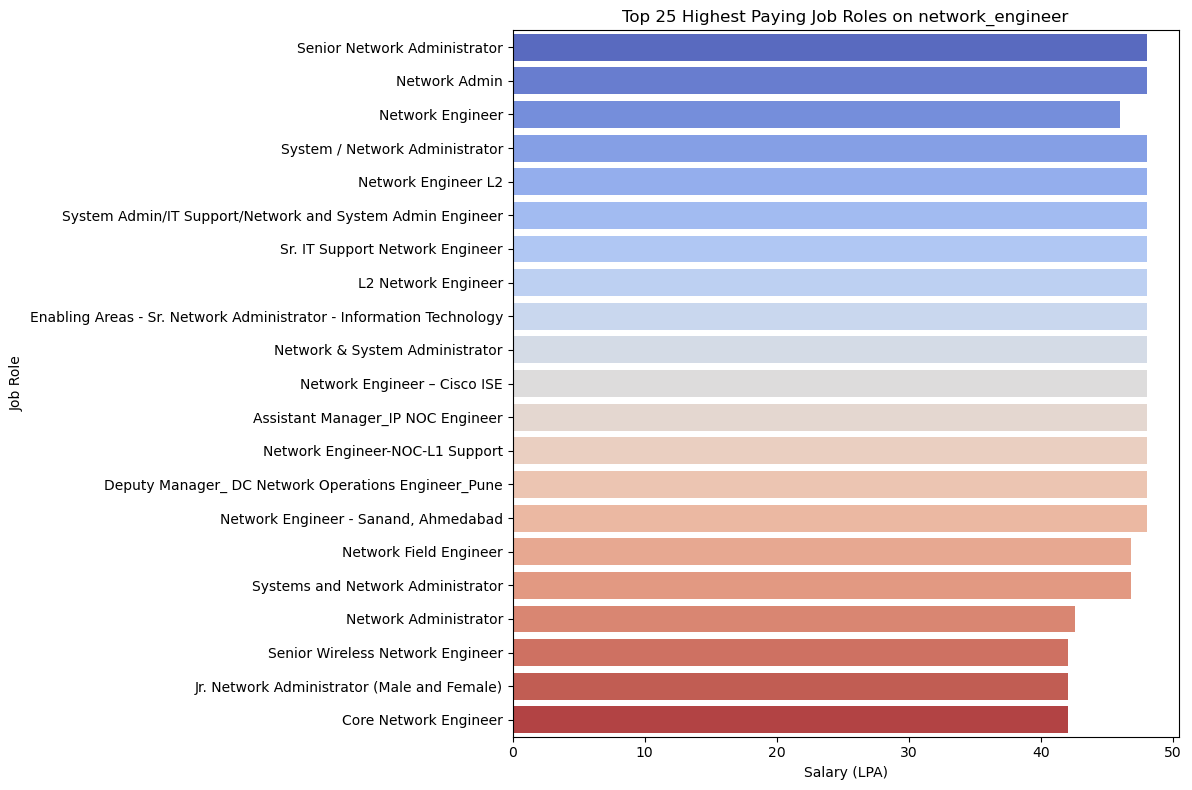

In [145]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [147]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_18696\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


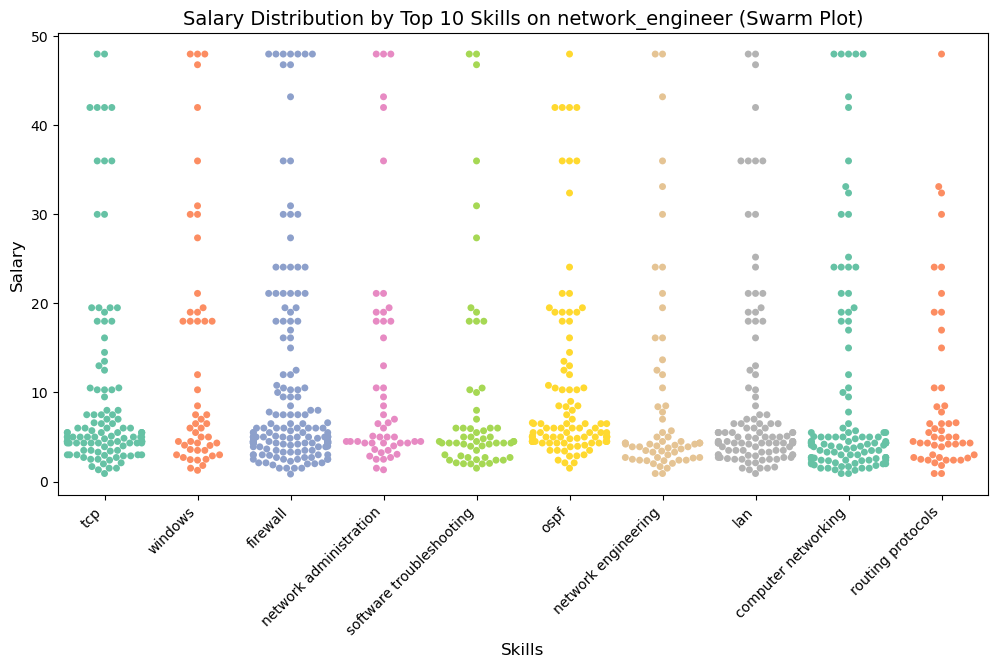

In [148]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

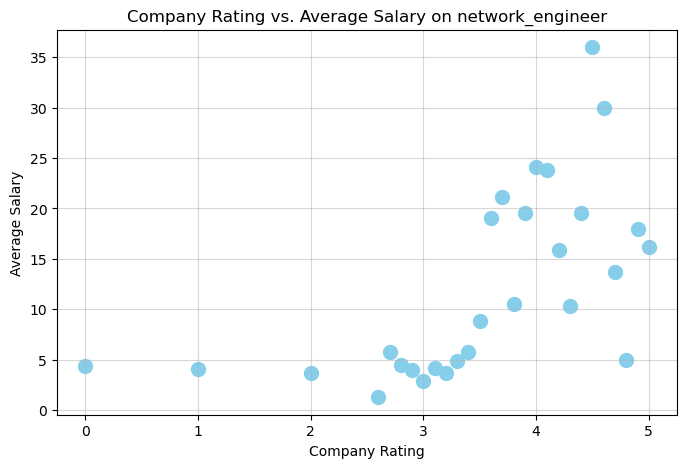

In [150]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [151]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.2770403367427732